In [1]:
# Library Imports for Data Analysis and Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import pearsonr, ttest_ind
import scipy.stats as stats
import statsmodels.api as sm


In [2]:
# Load Dataset

try:
    data = pd.read_csv('/Users/Pratyush/Downloads/LifeExpectancyData.csv')
except Exception as e:
    print(f"Failed to load dataset: {e}")
else:
    print("Dataset loaded successfully!\n")

Dataset loaded successfully!



In [3]:
# Display Settings for Better Readability

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

# Dataset Overview and Styled Preview

print(f"Shape of dataset: {data.shape}")
styled_preview = (
    data.head()
    .style
    .background_gradient(cmap='Blues')
    .set_caption("First 5 Rows of Life Expectancy Dataset")
    .set_table_styles([
        {'selector': 'caption',
         'props': [('color', 'black'),
                   ('font-size', '16px'),
                   ('text-align', 'left'),
                   ('font-family', 'Arial'),
                   ('font-weight', 'bold')]}
  ])
)
display(styled_preview)

Shape of dataset: (2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000000,263.000000,62,0.010000,71.279624,65.000000,1154,19.100000,83,6.000000,8.160000,65.000000,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000
1,Afghanistan,2014,Developing,59.900000,271.000000,64,0.010000,73.523582,62.000000,492,18.600000,86,58.000000,8.180000,62.000000,0.100000,612.696514,327582.000000,17.500000,17.500000,0.476000,10.000000
2,Afghanistan,2013,Developing,59.900000,268.000000,66,0.010000,73.219243,64.000000,430,18.100000,89,62.000000,8.130000,64.000000,0.100000,631.744976,31731688.000000,17.700000,17.700000,0.470000,9.900000
3,Afghanistan,2012,Developing,59.500000,272.000000,69,0.010000,78.184215,67.000000,2787,17.600000,93,67.000000,8.520000,67.000000,0.100000,669.959000,3696958.000000,17.900000,18.000000,0.463000,9.800000
4,Afghanistan,2011,Developing,59.200000,275.000000,71,0.010000,7.097109,68.000000,3013,17.200000,97,68.000000,7.870000,68.000000,0.100000,63.537231,2978599.000000,18.200000,18.200000,0.454000,9.500000


<Figure size 1200x500 with 0 Axes>

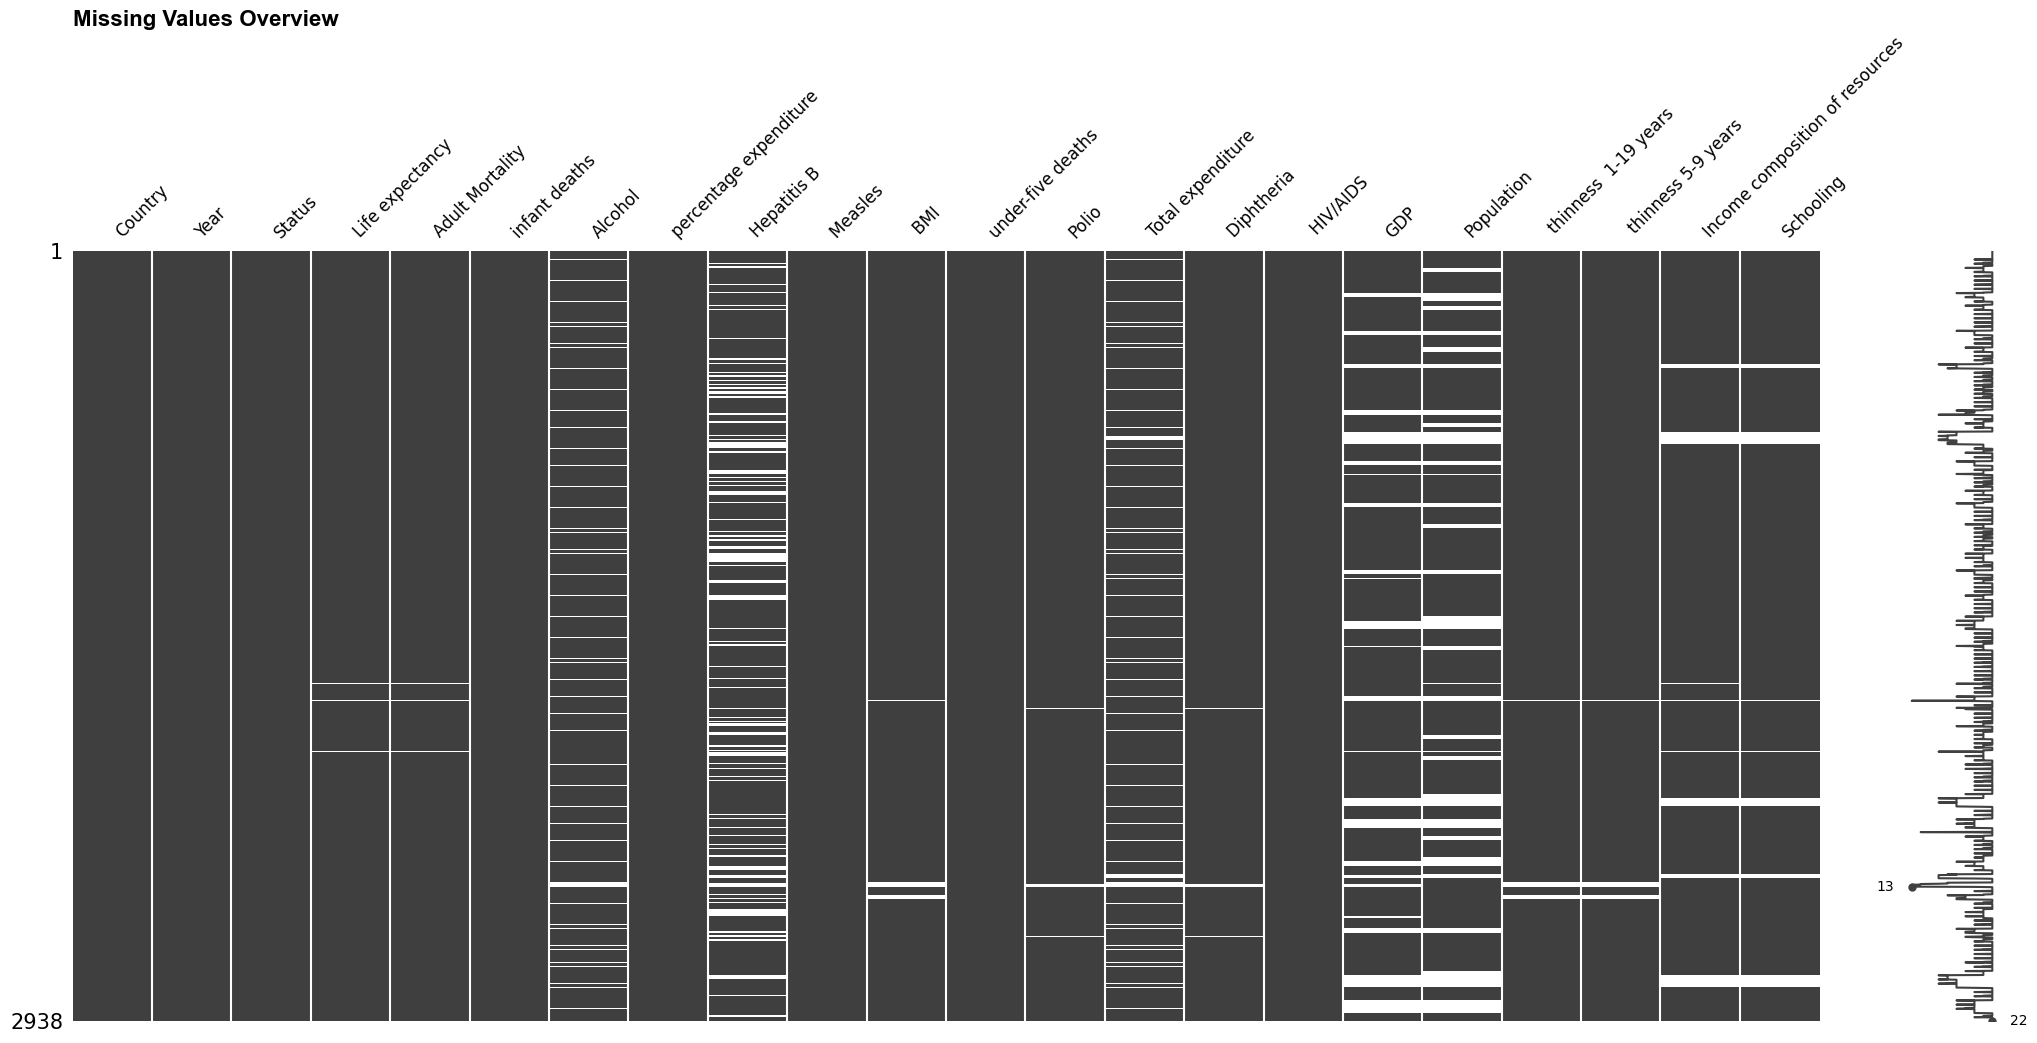

In [4]:
# Visualize Missing Values in Dataset

plt.figure(figsize=(12, 5))
msno.matrix(data, fontsize=12)
plt.title("Missing Values Overview", fontsize=16, fontweight='bold', fontname='Arial', loc='left')
plt.show()

In [5]:
# Initial data exploration

print("Initial Data Info:")
print(data.info())
print("\nSample Data:")
print(data.head())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  P

In [6]:
# Data cleaning: Strip trailing spaces from column names

# Clean column names in the original dataset

data.columns = data.columns.str.strip().str.replace(' +', ' ', regex=True)
data.columns = data.columns.str.replace(' ', '_')

# Define features and target using cleaned column names

features = [
    'Schooling', 'Income_composition_of_resources', 'BMI', 'Diphtheria', 'Polio',
    'GDP', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Total_expenditure',
    'Year', 'Population', 'Measles', 'infant_deaths', 'under-five_deaths',
    'thinness_5-9_years', 'thinness_1-19_years', 'HIV/AIDS', 'Adult_Mortality'
]
target = 'Life_expectancy'

#Create cleaned dataset by dropping rows with missing values in important columns

data_clean = data.dropna(subset=features + [target]).copy()

# Confirm data_clean structure
print(f"\ndata_clean shape: {data_clean.shape}")
print("Sample data_clean:")
print(data_clean.head())


data_clean shape: (1649, 22)
Sample data_clean:
       Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing            65.00           263.00   
1  Afghanistan  2014  Developing            59.90           271.00   
2  Afghanistan  2013  Developing            59.90           268.00   
3  Afghanistan  2012  Developing            59.50           272.00   
4  Afghanistan  2011  Developing            59.20           275.00   

   infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles   BMI  \
0             62     0.01                   71.28        65.00     1154 19.10   
1             64     0.01                   73.52        62.00      492 18.60   
2             66     0.01                   73.22        64.00      430 18.10   
3             69     0.01                   78.18        67.00     2787 17.60   
4             71     0.01                    7.10        68.00     3013 17.20   

   under-five_deaths  Polio  Total_expendit

In [7]:
print(list(data_clean.columns))

['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years', 'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling']


In [8]:
# Check for missing values in the dataset

print("\nMissing Values per Column:")
print(data.isna().sum())


Missing Values per Column:
Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64


In [9]:
# Drop rows with missing values in key columns

data_clean = data.dropna(subset=[
    'Life_expectancy', 'Schooling', 'Income_composition_of_resources', 'BMI',
    'Diphtheria', 'Polio', 'GDP', 'Alcohol', 'percentage_expenditure',
    'Hepatitis_B', 'Total_expenditure', 'Year', 'Population',
    'Measles', 'infant_deaths', 'under-five_deaths',
    'thinness_1-19_years', 'thinness_5-9_years', 'HIV/AIDS',
    'Adult_Mortality'
])
print(f"\nData shape after dropping rows with missing values in key columns: {data_clean.shape}")


Data shape after dropping rows with missing values in key columns: (1649, 22)


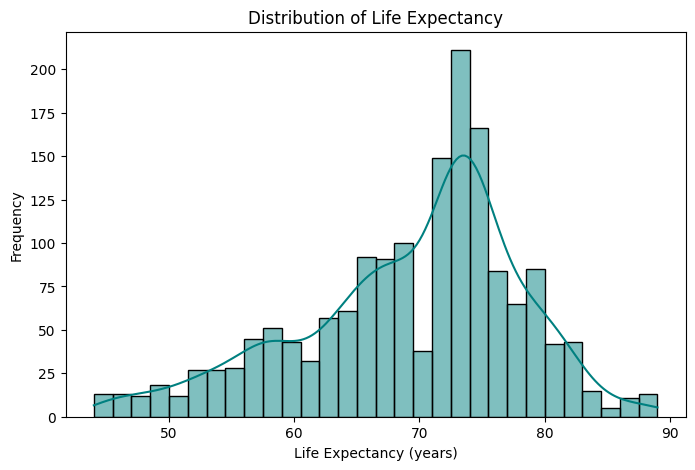

In [10]:
# Plot histogram to visualize distribution of Life Expectancy

plt.figure(figsize=(8,5))
sns.histplot(data_clean['Life_expectancy'], bins=30, kde=True, color='teal')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.show()

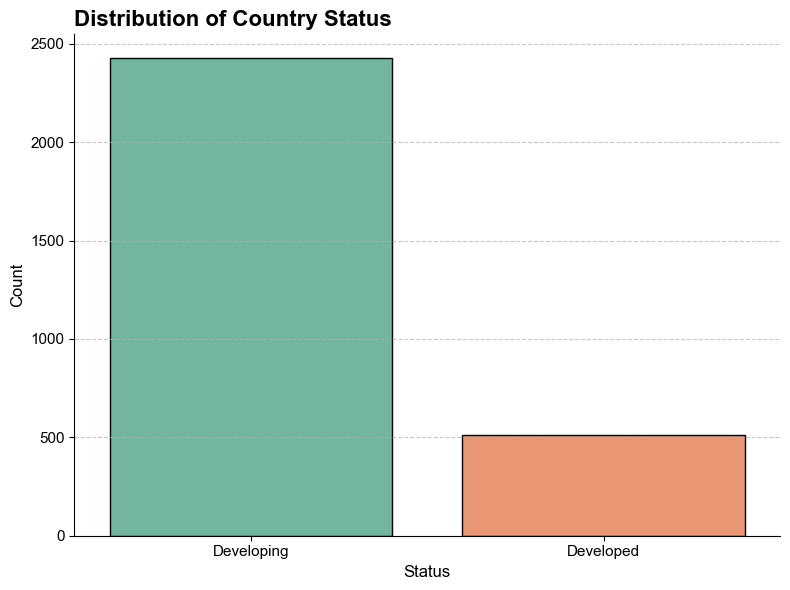

In [11]:
# Plot Distribution of Country Status (Developed vs Developing)

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Status', hue='Status', palette='Set2', edgecolor='black', legend=False)
plt.title("Distribution of Country Status", fontsize=16, fontweight='bold', fontname='Arial', loc='left')
plt.xlabel("Status", fontsize=12, fontname='Arial')
plt.ylabel("Count", fontsize=12, fontname='Arial')
plt.xticks(fontsize=11, fontname='Arial')
plt.yticks(fontsize=11, fontname='Arial')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

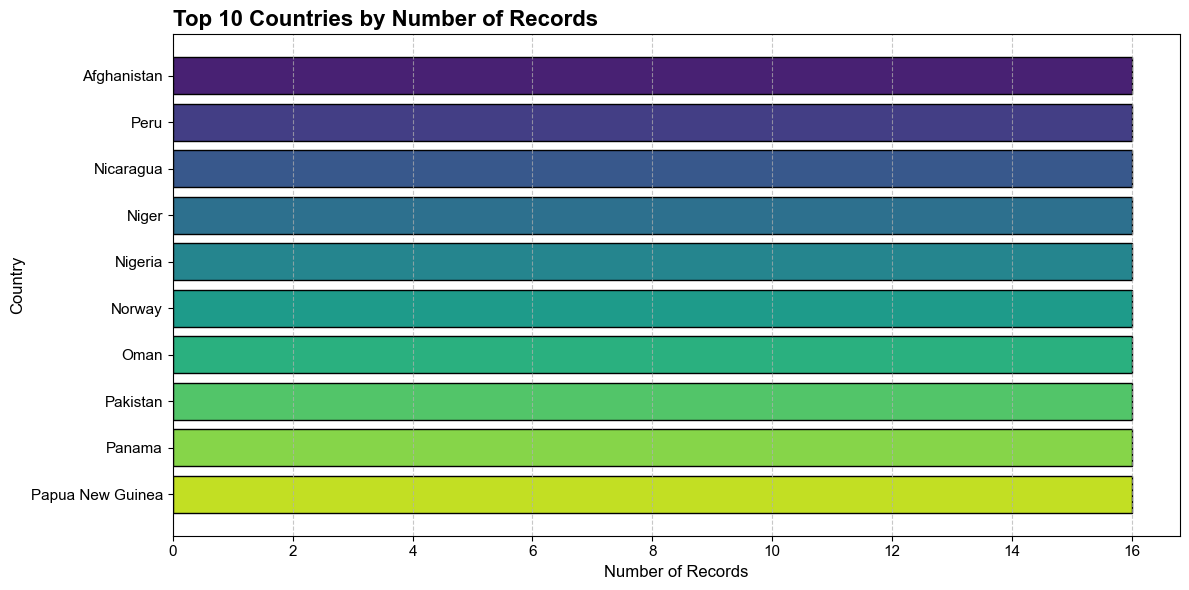

In [12]:
# Identify Top 10 Countries by Number of Records

top_countries = data['Country'].value_counts().head(10)

# Generate Color Palette for Bar Plot

colors = sns.color_palette("viridis", n_colors=len(top_countries))

# Plot Horizontal Bar Chart for Top 10 Countries

plt.figure(figsize=(12,6))
plt.barh(top_countries.index, top_countries.values, color=colors, edgecolor='black')
plt.title("Top 10 Countries by Number of Records", fontsize=16, fontweight='bold', fontname='Arial', loc='left')
plt.xlabel("Number of Records", fontsize=12, fontname='Arial')
plt.ylabel("Country", fontsize=12, fontname='Arial')
plt.xticks(fontsize=11, fontname='Arial')
plt.yticks(fontsize=11, fontname='Arial')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Highest count on top for better readability
plt.tight_layout()
plt.show()

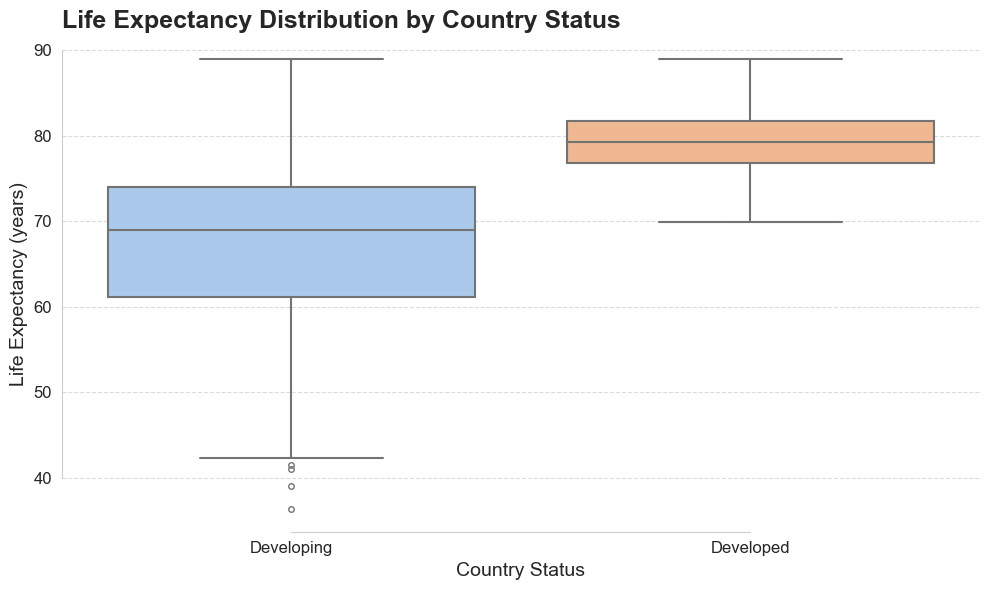

In [13]:
# Set Plot Style

sns.set_style("whitegrid")

# Initialize Figure

plt.figure(figsize=(10,6))

# Create Boxplot and Customize Plot Appearance 

sns.boxplot(data=data, x='Status', y='Life_expectancy', 
            hue='Status', palette='pastel', linewidth=1.5, fliersize=4, dodge=False)
plt.title("Life Expectancy Distribution by Country Status", fontsize=18, fontweight='bold', fontname='Arial', loc='left')
plt.xlabel("Country Status", fontsize=14, fontname='Arial')
plt.ylabel("Life Expectancy (years)", fontsize=14, fontname='Arial')
plt.xticks(fontsize=12, fontname='Arial')
plt.yticks(fontsize=12, fontname='Arial')
plt.legend([],[], frameon=False)  # Remove legend since hue = x
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(trim=True)
plt.tight_layout()
plt.show()

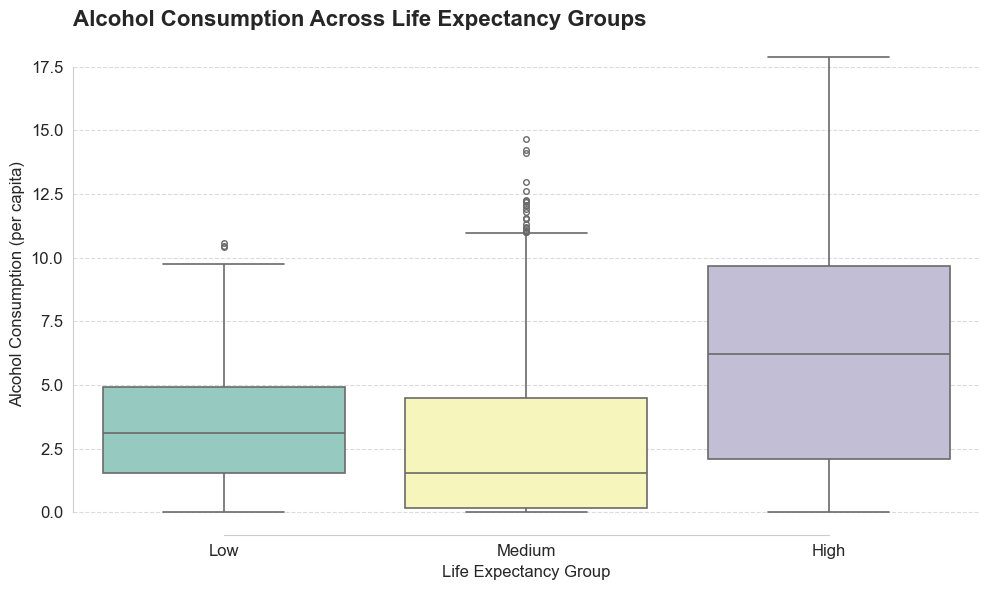

In [14]:
# Create Life Expectancy Group

data['LifeExp_Group'] = pd.cut(data['Life_expectancy'], 
                               bins=[0, 50, 70, 100], 
                               labels=['Low', 'Medium', 'High'])

# Set Plot Style
sns.set_style("whitegrid")

# Initialize Figure
plt.figure(figsize=(10,6))

# Create Boxplot and Customize Plot Appearance 
sns.boxplot(data=data, x='LifeExp_Group', y='Alcohol', 
            hue='LifeExp_Group', palette='Set3', linewidth=1.2, fliersize=4, dodge=False)

plt.title("Alcohol Consumption Across Life Expectancy Groups", fontsize=16, fontweight='bold', fontname='Arial', loc='left')
plt.xlabel("Life Expectancy Group", fontsize=12, fontname='Arial')
plt.ylabel("Alcohol Consumption (per capita)", fontsize=12, fontname='Arial')
plt.xticks(fontsize=12, fontname='Arial')
plt.yticks(fontsize=12, fontname='Arial')

plt.legend([], [], frameon=False)  # Remove legend since hue = x
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(trim=True)
plt.tight_layout()
plt.show()



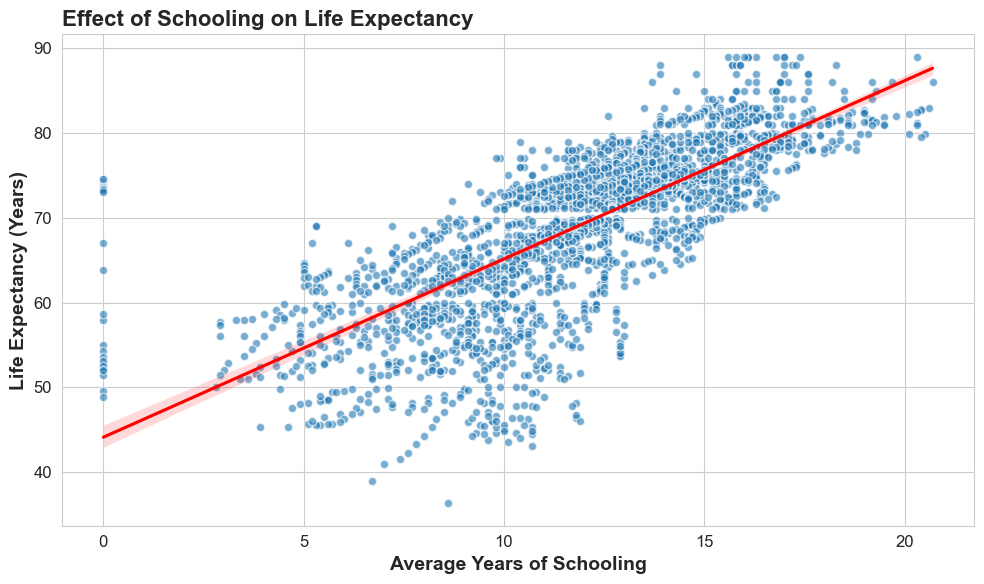

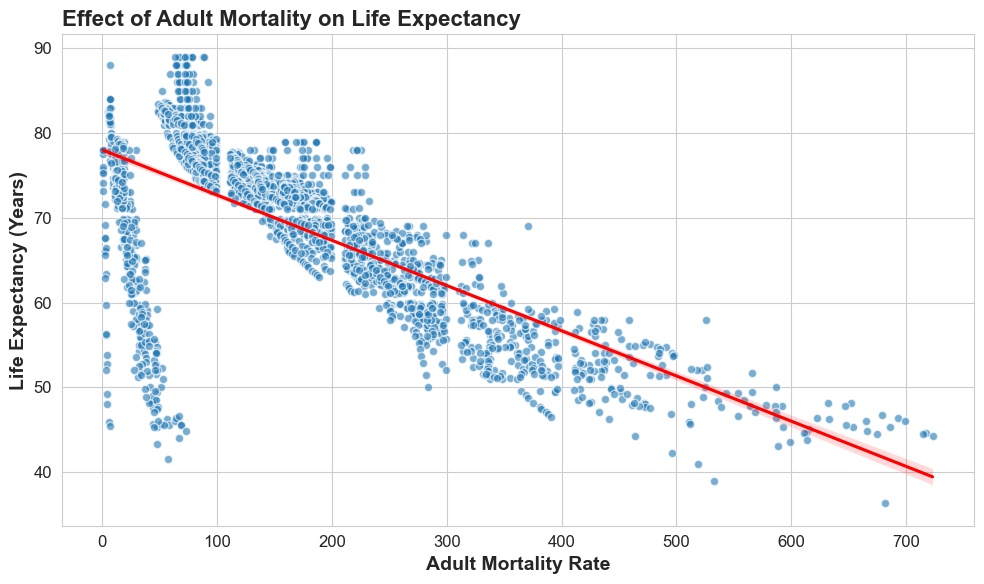

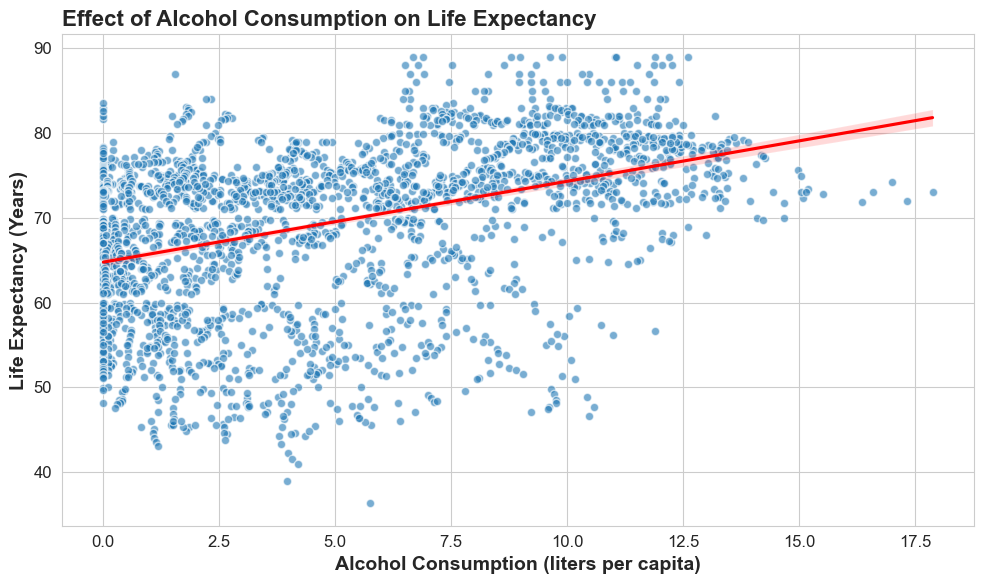

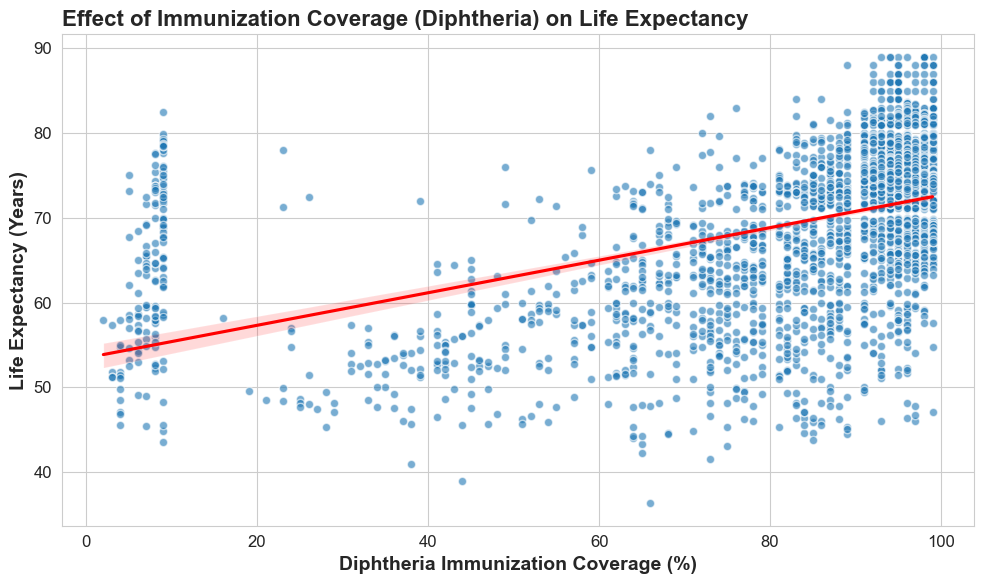

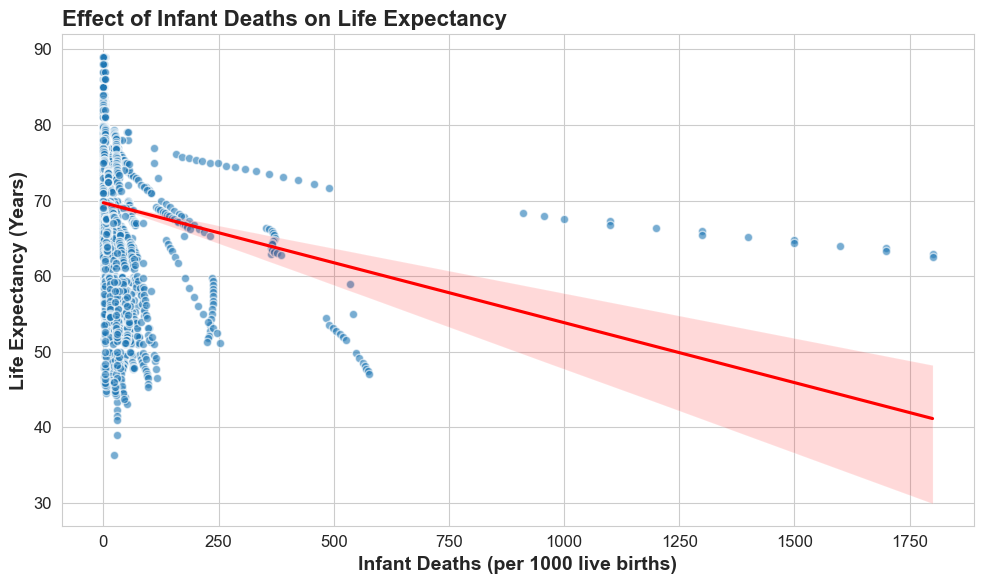

In [15]:
# Set global plot style for consistency

sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'Arial',
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.labelweight': 'bold',
})

# Define helper function to plot scatter with regression line

def plot_scatter_reg(data, x, y, xlabel, ylabel, title, figsize=(10,6)):
    plt.figure(figsize=figsize)
    sns.regplot(data=data, x=x, y=y, 
                scatter_kws={'alpha':0.6, 'edgecolor':'w'}, 
                line_kws={'color':'red'})
    plt.title(title, loc='left')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# Effect of Schooling on Life Expectancy

plot_scatter_reg(
    data,
    x='Schooling',
    y='Life_expectancy',
    xlabel='Average Years of Schooling',
    ylabel='Life Expectancy (Years)',
    title='Effect of Schooling on Life Expectancy'
)

# Effect of Adult Mortality on Life Expectancy

plot_scatter_reg(
    data,
    x='Adult_Mortality',
    y='Life_expectancy',
    xlabel='Adult Mortality Rate',
    ylabel='Life Expectancy (Years)',
    title='Effect of Adult Mortality on Life Expectancy'
)

# Effect of Alcohol Consumption on Life Expectancy

plot_scatter_reg(
    data,
    x='Alcohol',
    y='Life_expectancy',
    xlabel='Alcohol Consumption (liters per capita)',
    ylabel='Life Expectancy (Years)',
    title='Effect of Alcohol Consumption on Life Expectancy'
)

# Effect of Immunization Coverage (Diphtheria) on Life Expectancy

plot_scatter_reg(
    data,
    x='Diphtheria',
    y='Life_expectancy',
    xlabel='Diphtheria Immunization Coverage (%)',
    ylabel='Life Expectancy (Years)',
    title='Effect of Immunization Coverage (Diphtheria) on Life Expectancy'
)

# Effect of Infant Deaths on Life Expectancy

plot_scatter_reg(
    data,
    x='infant_deaths',
    y='Life_expectancy',
    xlabel='Infant Deaths (per 1000 live births)',
    ylabel='Life Expectancy (Years)',
    title='Effect of Infant Deaths on Life Expectancy'
)

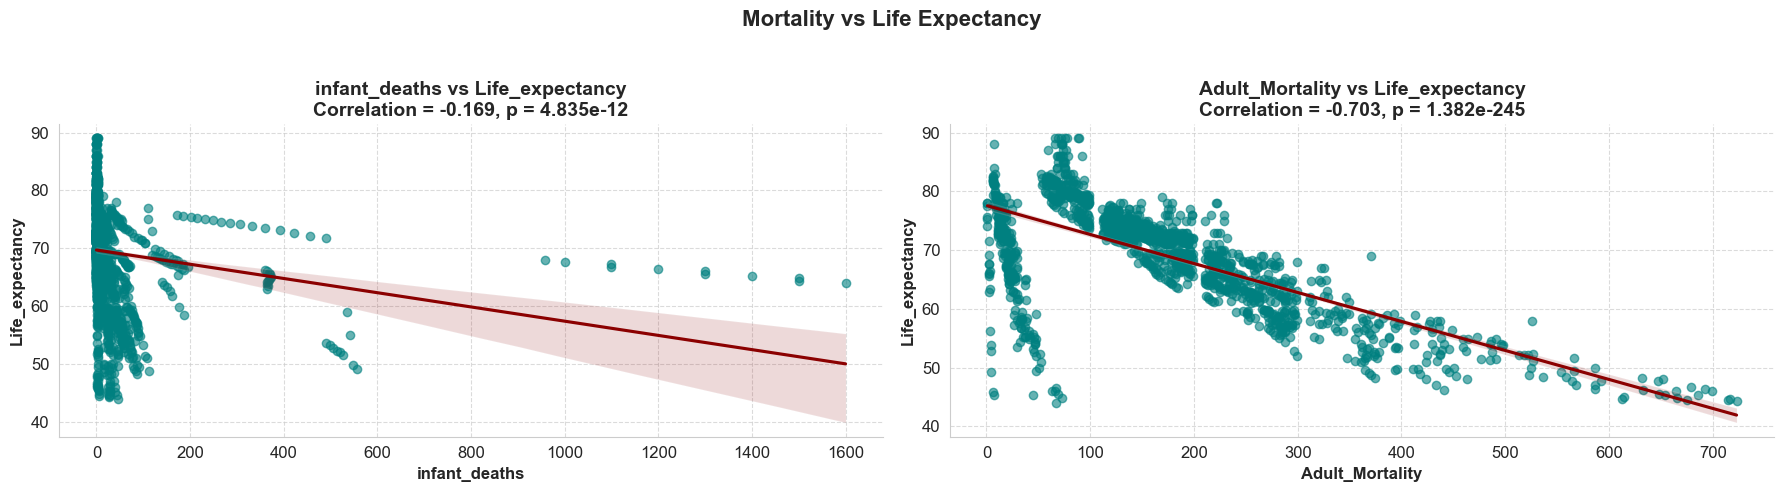

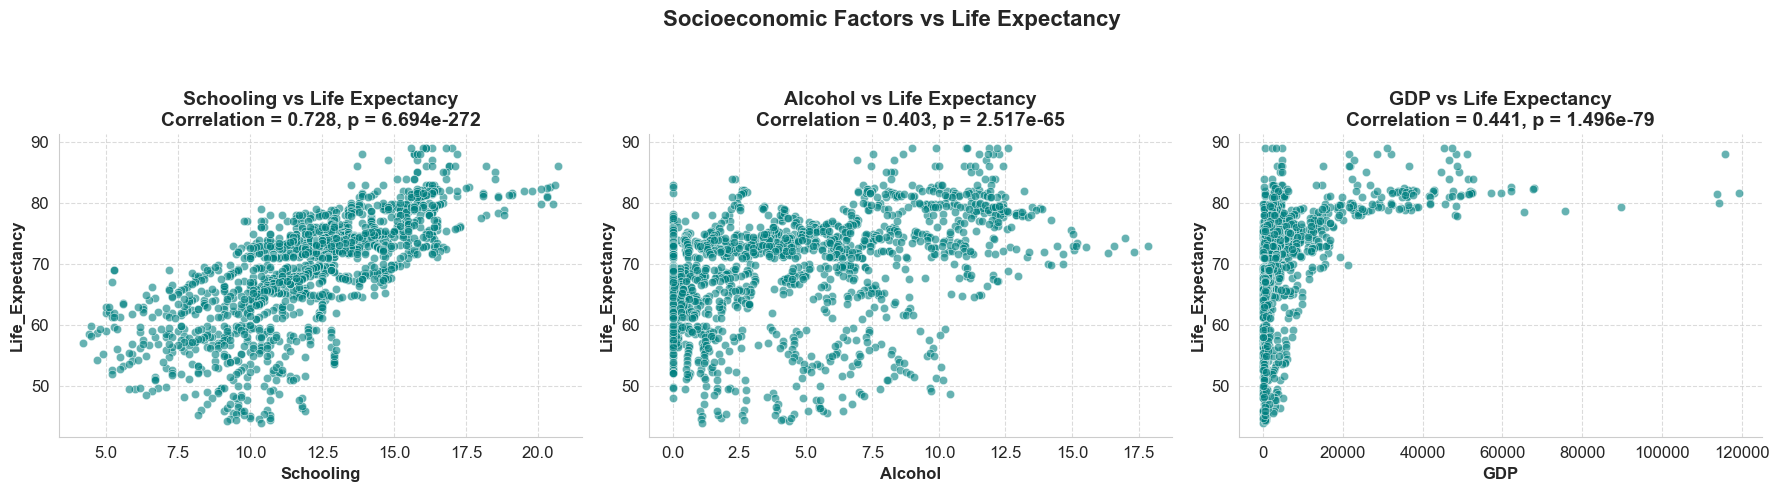

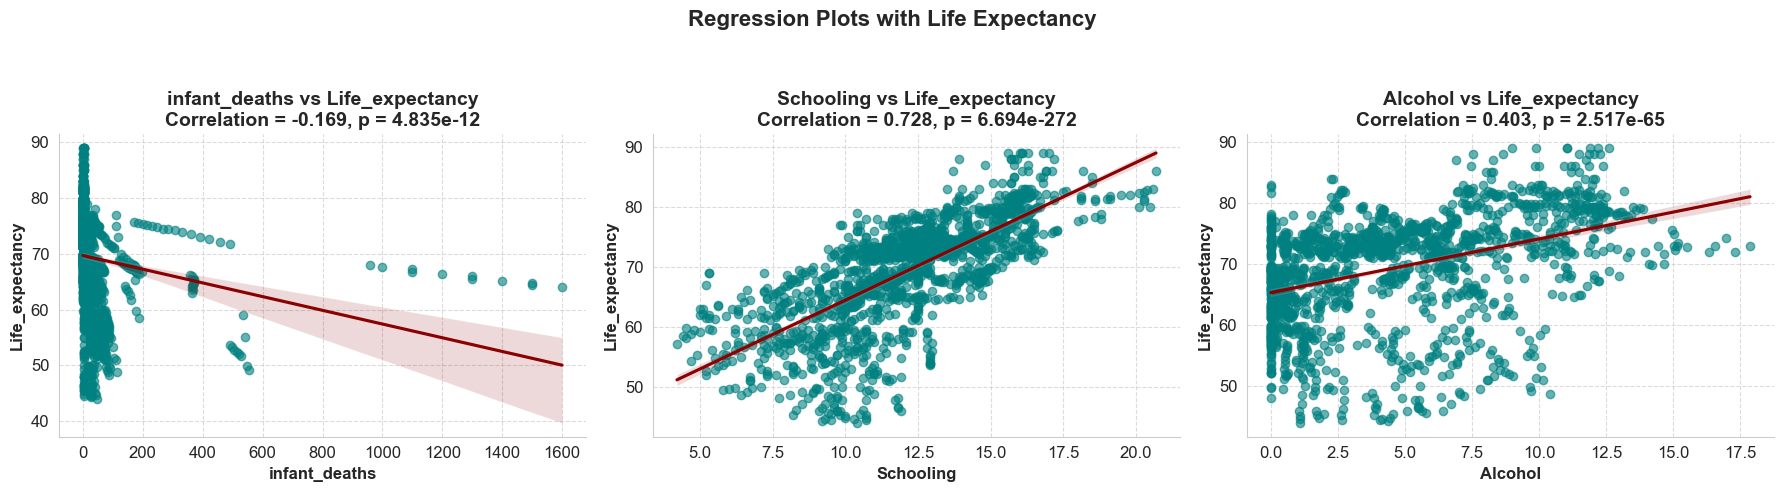

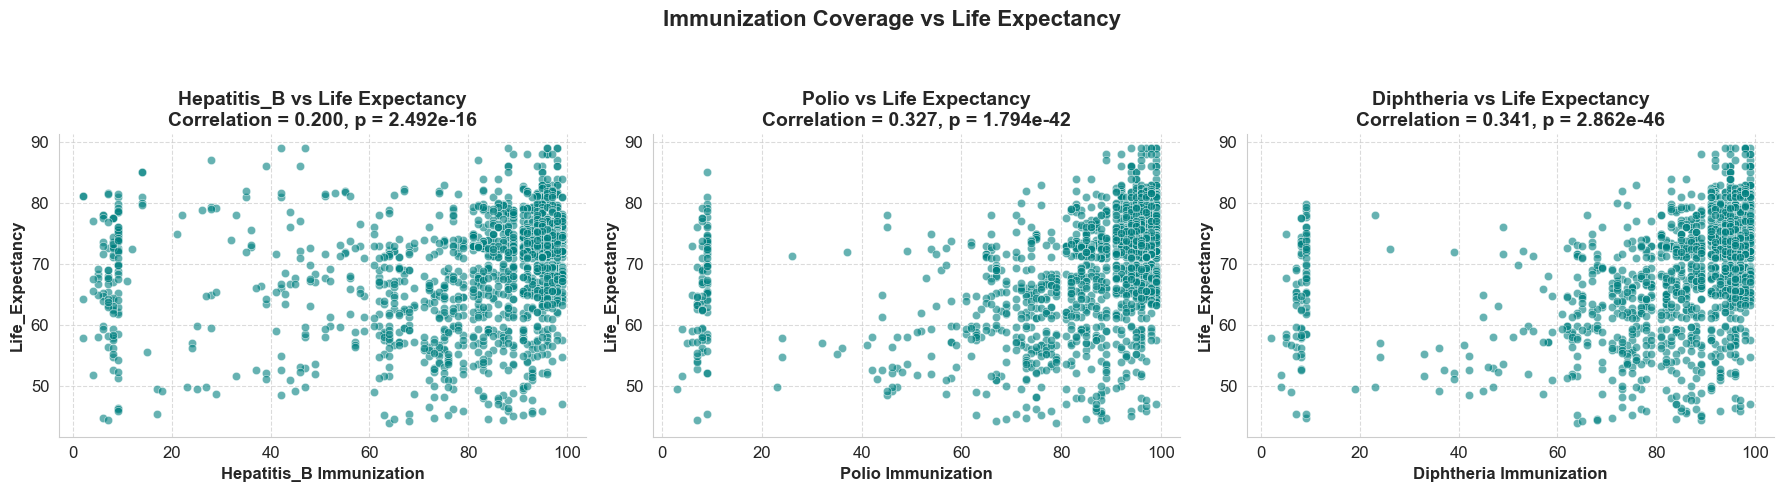

In [16]:
# Set global plot style

sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'Arial',
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 12
})

# Common styling variables

scatter_color = 'teal'
line_color = 'darkred'
scatter_alpha = 0.6
grid_style = {'linestyle': '--', 'alpha': 0.7}

# Function to plot regression with correlation & p-value

def reg_plot(data, x, y='Life_expectancy', ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 5))
    sns.regplot(x=x, y=y, data=data, ax=ax,
                scatter_kws={'alpha': scatter_alpha, 'color': scatter_color},
                line_kws={'color': line_color})
    corr, p = pearsonr(data[x].dropna(), data[y].dropna())
    ax.set_title(f'{x} vs {y}\nCorrelation = {corr:.3f}, p = {p:.3e}')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.grid(True, **grid_style)
    sns.despine()

# Mortality vs Life Expectancy

fig, axes = plt.subplots(1, 2, figsize=(18, 5))
reg_plot(data_clean, 'infant_deaths', ax=axes[0])
reg_plot(data_clean, 'Adult_Mortality', ax=axes[1])
fig.suptitle("Mortality vs Life Expectancy", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Schooling, Alcohol, GDP vs Life Expectancy (Scatter)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, col in zip(axes, ['Schooling', 'Alcohol', 'GDP']):
    sns.scatterplot(data=data_clean, x=col, y='Life_expectancy', ax=ax, alpha=scatter_alpha, color=scatter_color)
    corr, p = pearsonr(data_clean[col].dropna(), data_clean['Life_expectancy'].dropna())
    ax.set_title(f'{col} vs Life Expectancy\nCorrelation = {corr:.3f}, p = {p:.3e}')
    ax.set_xlabel(col)
    ax.set_ylabel('Life_Expectancy')
    ax.grid(True, **grid_style)
    sns.despine(ax=ax)
fig.suptitle("Socioeconomic Factors vs Life Expectancy", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

# Regression Plots (Infant Deaths, Schooling, Alcohol)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, col in zip(axes, ['infant_deaths', 'Schooling', 'Alcohol']):
    reg_plot(data_clean, col, ax=ax)
fig.suptitle("Regression Plots with Life Expectancy", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

# Immunization Coverage vs Life Expectancy

immunization_cols = ['Hepatitis_B', 'Polio', 'Diphtheria']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, col in zip(axes, immunization_cols):
    sns.scatterplot(data=data_clean, x=col, y='Life_expectancy', ax=ax, alpha=scatter_alpha, color=scatter_color)
    corr, p = pearsonr(data_clean[col].dropna(), data_clean['Life_expectancy'].dropna())
    ax.set_title(f'{col} vs Life Expectancy\nCorrelation = {corr:.3f}, p = {p:.3e}')
    ax.set_xlabel(f'{col} Immunization')
    ax.set_ylabel('Life_Expectancy')
    ax.grid(True, **grid_style)
    sns.despine(ax=ax)
fig.suptitle("Immunization Coverage vs Life Expectancy", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

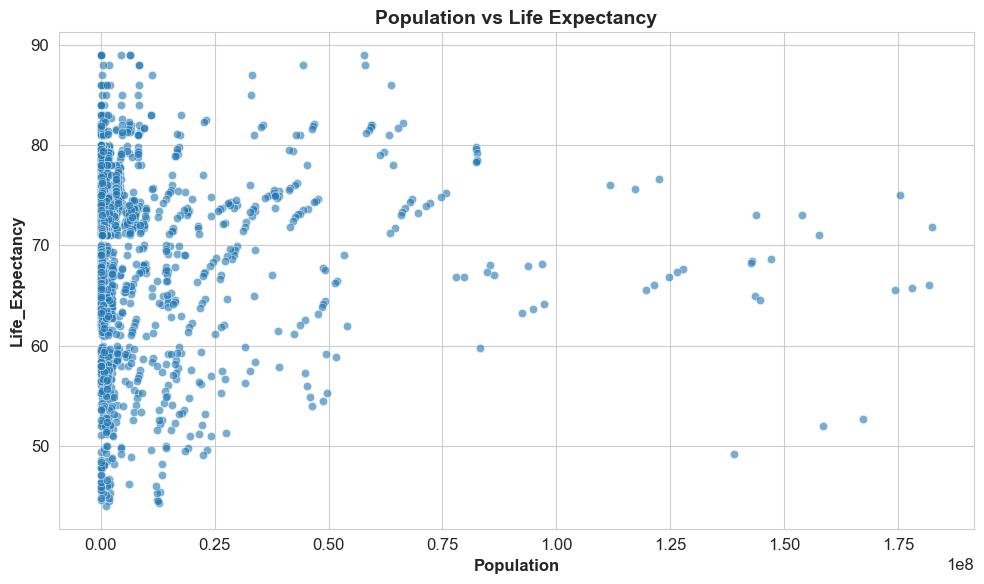

Correlation between Population and Life Expectancy: -0.002


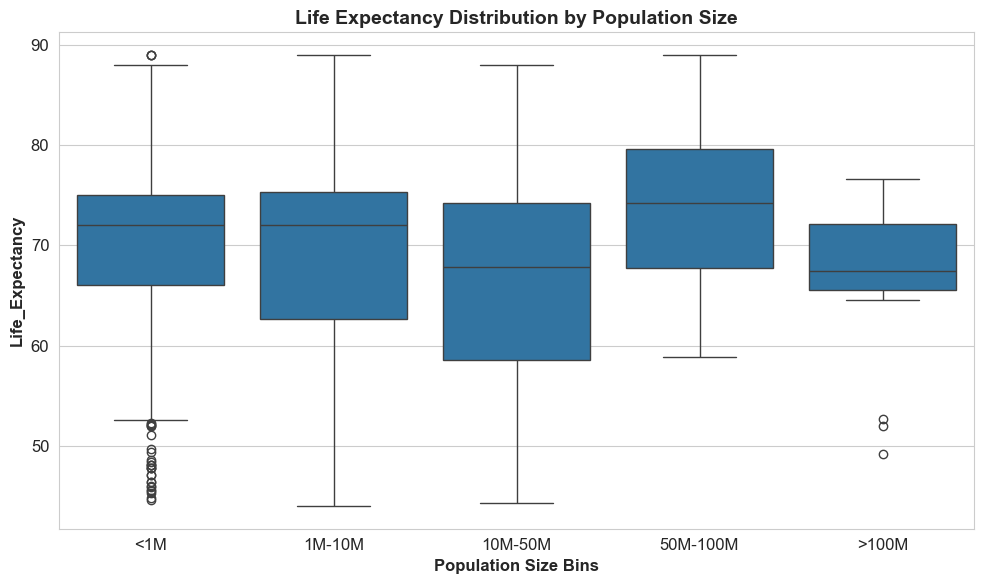

In [17]:
# Define bins and labels for population size categories

bins = [0, 1e6, 1e7, 5e7, 1e8, 5e8]
labels = ['<1M', '1M-10M', '10M-50M', '50M-100M', '>100M']

# Filter out extreme population outliers beyond the 99th percentile for better visualization

pop_99th_percentile = data_clean['Population'].quantile(0.99)
filtered_data = data_clean[data_clean['Population'] < pop_99th_percentile].copy()

# Create population bins based on defined ranges

filtered_data['Population_bin'] = pd.cut(filtered_data['Population'], bins=bins, labels=labels)

# Scatter plot: Population vs Life Expectancy

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Population', y='Life_expectancy', alpha=0.6)
plt.title('Population vs Life Expectancy')
plt.xlabel('Population')
plt.ylabel('Life_Expectancy')
plt.tight_layout()
plt.show()

# Calculate and print Pearson correlation coefficient

correlation = filtered_data['Population'].corr(filtered_data['Life_expectancy'])
print(f"Correlation between Population and Life Expectancy: {correlation:.3f}")

# Box plot: Life Expectancy across Population Size Bins

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Population_bin', y='Life_expectancy')
plt.title('Life Expectancy Distribution by Population Size')
plt.xlabel('Population Size Bins')
plt.ylabel('Life_Expectancy')
plt.tight_layout()
plt.show()

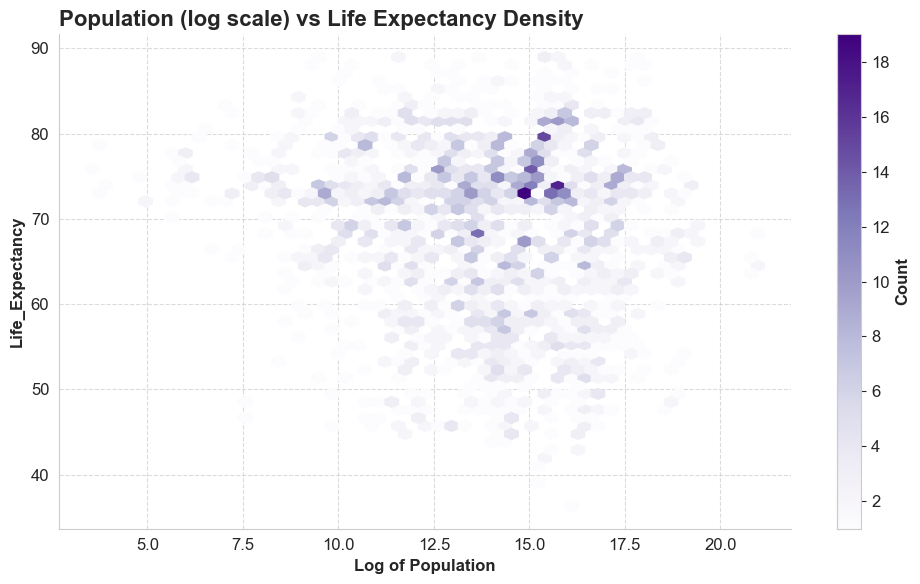

In [18]:
# Hexbin plot to visualize population vs life expectancy density for clearer insights

plt.figure(figsize=(10,6))
hb = plt.hexbin(np.log1p(data['Population']), data['Life_expectancy'], gridsize=50, cmap='Purples', mincnt=1)
plt.colorbar(hb, label='Count')
plt.title("Population (log scale) vs Life Expectancy Density", fontsize=16, fontweight='bold', fontname='Arial', loc='left')
plt.xlabel("Log of Population", fontsize=12, fontname='Arial')
plt.ylabel("Life_Expectancy", fontsize=12, fontname='Arial')
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

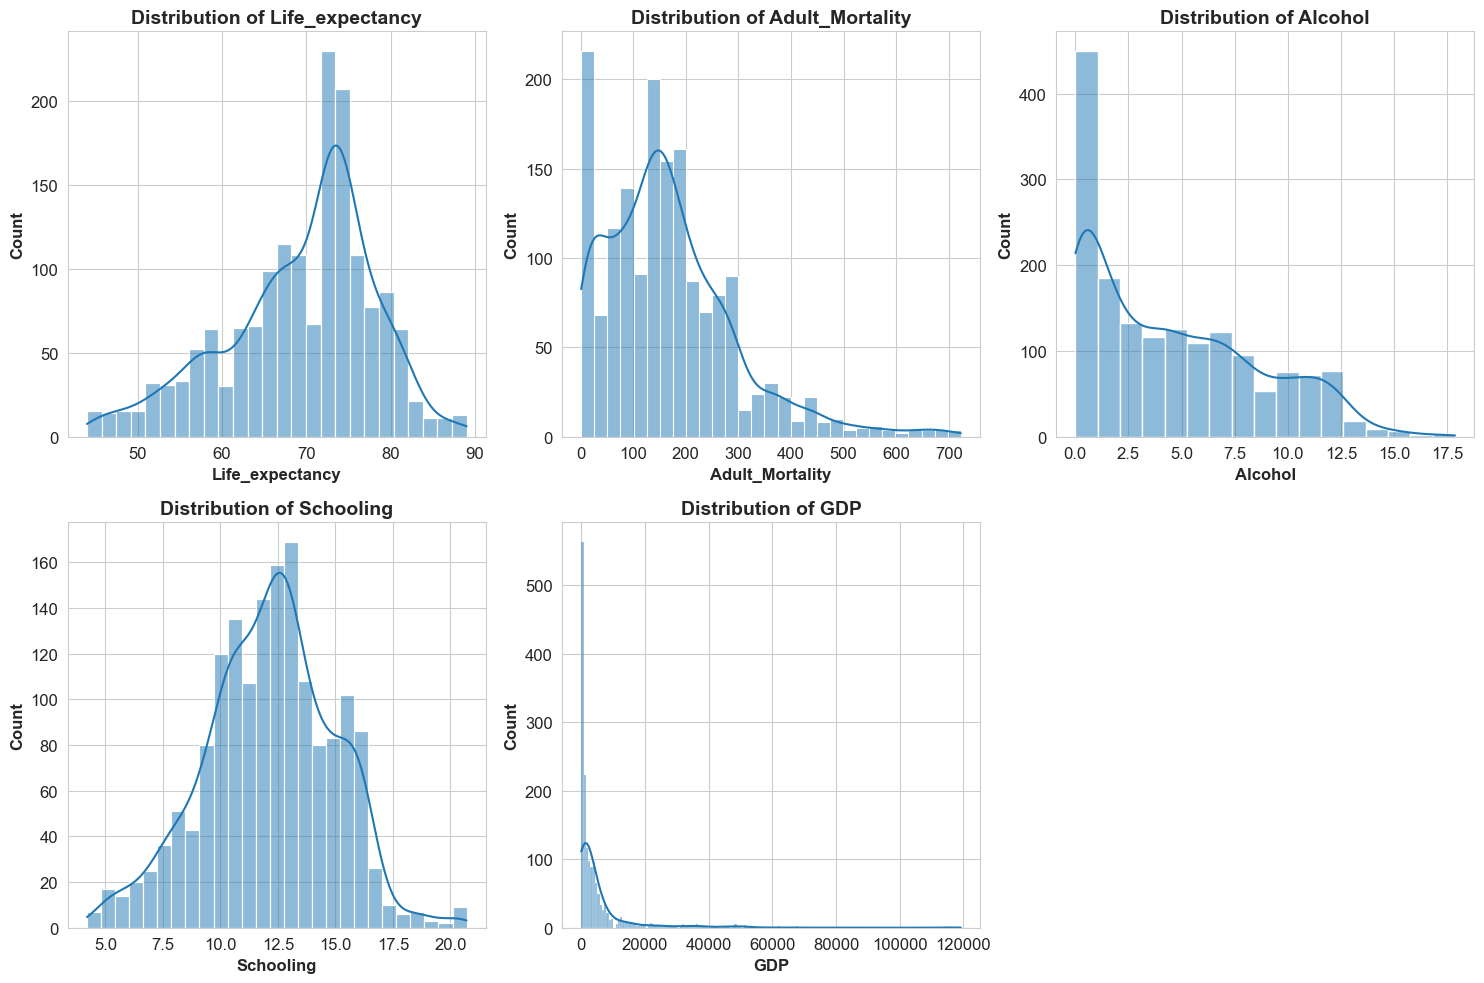

In [19]:
# Distribution plots of key features to understand data spread and shape

cols_to_plot = ['Life_expectancy', 'Adult_Mortality', 'Alcohol', 'Schooling', 'GDP']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

,count,mean,std,min,25%,50%,75%,max
Year,2938.000000,2007.518720,4.613841,2000.000000,2004.000000,2008.000000,2012.000000,2015.000000
Life_expectancy,2928.000000,69.224932,9.523867,36.300000,63.100000,72.100000,75.700000,89.000000
Adult_Mortality,2928.000000,164.796448,124.292079,1.000000,74.000000,144.000000,228.000000,723.000000
infant_deaths,2938.000000,30.303948,117.926501,0.000000,0.000000,3.000000,22.000000,1800.000000
Alcohol,2744.000000,4.602861,4.052413,0.010000,0.877500,3.755000,7.702500,17.870000
percentage_expenditure,2938.000000,738.251295,1987.914858,0.000000,4.685343,64.912906,441.534144,19479.911610
Hepatitis_B,2385.000000,80.940461,25.070016,1.000000,77.000000,92.000000,97.000000,99.000000
Measles,2938.000000,2419.592240,11467.272489,0.000000,0.000000,17.000000,360.250000,212183.000000
BMI,2904.000000,38.321247,20.044034,1.000000,19.300000,43.500000,56.200000,87.300000
under-five_deaths,2938.000000,42.035739,160.445548,0.000000,0.000000,4.000000,28.000000,2500.000000


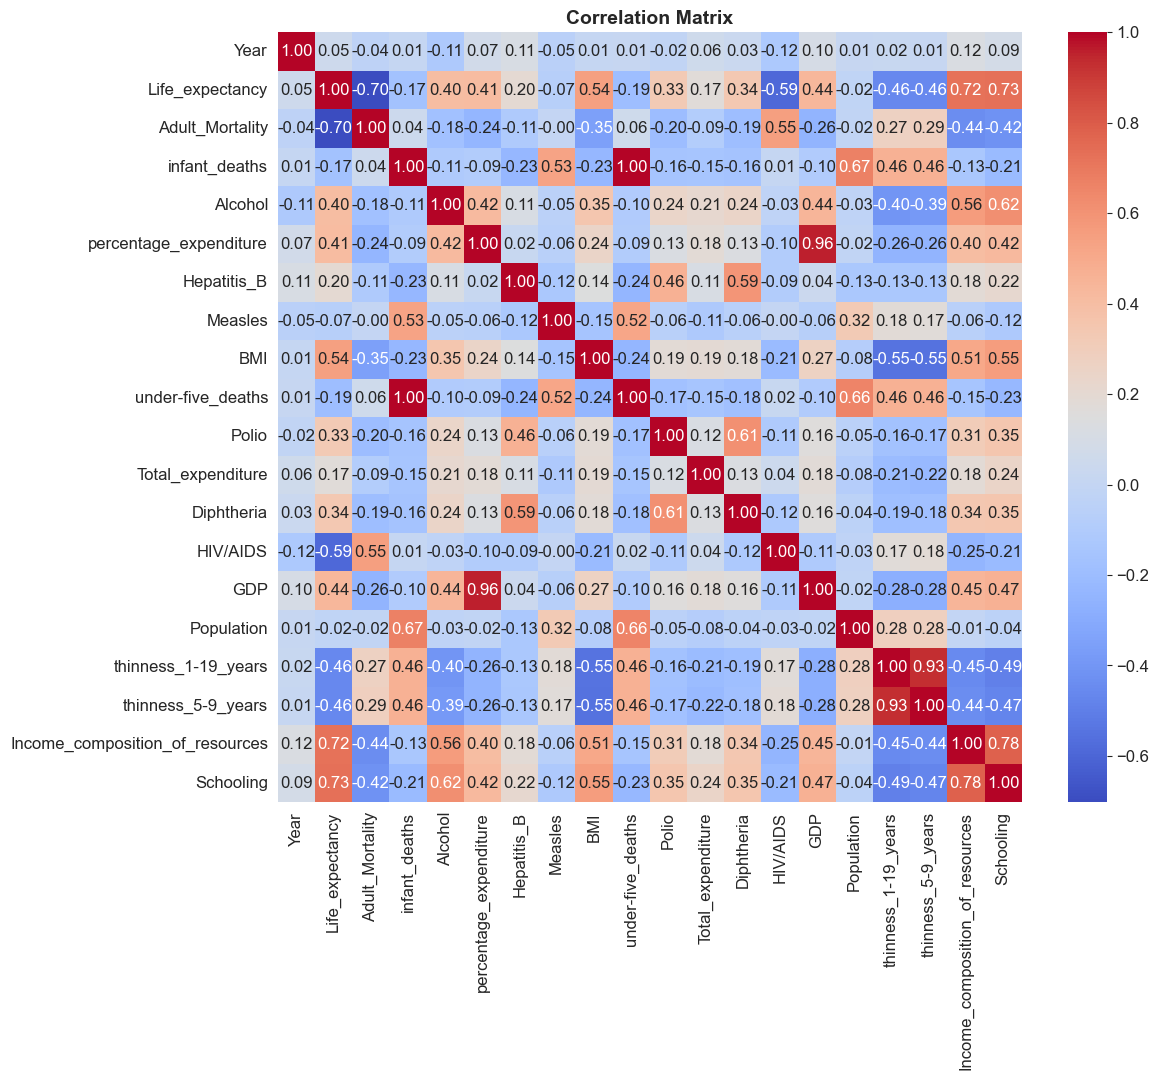


Features Correlated with Life Expectancy:
Schooling                          0.73
Income_composition_of_resources    0.72
BMI                                0.54
GDP                                0.44
percentage_expenditure             0.41
Alcohol                            0.40
Diphtheria                         0.34
Polio                              0.33
Hepatitis_B                        0.20
Total_expenditure                  0.17
Year                               0.05
Population                        -0.02
Measles                           -0.07
infant_deaths                     -0.17
under-five_deaths                 -0.19
thinness_5-9_years                -0.46
thinness_1-19_years               -0.46
HIV/AIDS                          -0.59
Adult_Mortality                   -0.70
Name: Life_expectancy, dtype: float64


In [20]:
# Summary Statistics for Numerical Features

# Select numerical columns only

numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Display descriptive statistics

summary_stats = numerical_data.describe().T.style.background_gradient(cmap='coolwarm').set_caption("Summary Statistics for Numerical Features")
display(summary_stats)

# Correlation Matrix Heatmap

plt.figure(figsize=(12, 10))
numeric_data = data_clean.select_dtypes(include=['float64', 'int64'])  
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Correlation with Life Expectancy

life_exp_corr = corr['Life_expectancy'].drop('Life_expectancy').sort_values(ascending=False)
print("\nFeatures Correlated with Life Expectancy:")
print(life_exp_corr)

In [21]:
# Define features and target (with corrected cleaned names)
features = [
    'Schooling', 'Income_composition_of_resources', 'BMI', 'Diphtheria', 'Polio',
    'GDP', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Total_expenditure',
    'Year', 'Population', 'Measles', 'infant_deaths', 'under-five_deaths',
    'thinness_5-9_years', 'thinness_1-19_years', 'HIV/AIDS', 'Adult_Mortality'
]
target = 'Life_expectancy'

# Correlation Significance Testing

print("\n" + "="*90)
print("Correlation Significance Testing".center(90))
print("="*90)
print(f"{'Feature':<35} {'Correlation':>12} {'p-value':>15} {'Significance':>20}")
print("-" * 90)

for feature in features:
    try:
        valid = data[[feature, target]].dropna()
        if len(valid) > 1:
            corr, p_value = pearsonr(valid[feature], valid[target])
            significance = "Significant" if p_value < 0.05 else "Not Significant"
            print(f"{feature:<35} {corr:>12.3f} {p_value:>15.3e} {significance:>20}")
        else:
            print(f"{feature:<35} {'N/A':>12} {'N/A':>15} {'Insufficient data':>20}")
    except Exception as e:
        print(f"{feature:<35} {'ERROR':>12} {'-':>15} {str(e):>20}")

# Multivariate Linear Regression

print("\n" + "="*90)
print("Multivariate Linear Regression".center(90))
print("="*90)

df_reg = data[features + [target]].dropna()
X = sm.add_constant(df_reg[features])
y = df_reg[target]
model = sm.OLS(y, X).fit()

print(f"R-squared: {model.rsquared:.3f}")
print(f"Adjusted R-squared: {model.rsquared_adj:.3f}\n")
print(f"{'Feature':<35} {'Coef':>10} {'Std Err':>10} {'t-value':>10} {'P>|t|':>10}")
print("-" * 90)

for feat in model.params.index:
    print(f"{feat:<35} {model.params[feat]:>10.4f} {model.bse[feat]:>10.4f} {model.tvalues[feat]:>10.3f} {model.pvalues[feat]:>10.3e}")

# Group-wise t-test

print("\n" + "="*90)
print("Group-wise t-test".center(90))
print("="*90)

group_low = data[data[target] < 65]['percentage_expenditure'].dropna()
group_high = data[data[target] >= 65]['percentage_expenditure'].dropna()
t_stat, p_val = ttest_ind(group_low, group_high, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"p-value: {p_val:.3e}")
print("=> Interpretation: Significant difference in healthcare spending between the two life expectancy groups.\n")

# Interpretation Summary

print("="*90)
print("Interpretation Summary".center(90))
print("="*90)

print("\nPOSITIVE FACTORS")
print("-" * 90)
print("Schooling, Income_composition_of_resources, and Total_expenditure are positively correlated with life expectancy.")
print("More education and greater resource access typically lead to improved health outcomes and longer lives.")

print("\nNEGATIVE FACTORS")
print("-" * 90)
print("HIV/AIDS, Adult_Mortality, and Infant/Under-5 deaths are negatively correlated with life expectancy.")
print("These highlight key areas where mortality risks sharply reduce overall life expectancy.")

print("\nREGRESSION MODEL INSIGHTS")
print("-" * 90)
print("The multivariate regression model explains a significant portion of variability (R² = {:.3f}).".format(model.rsquared))
print("Several predictors are statistically significant. Consider checking for multicollinearity among predictors.")

print("\nHEALTHCARE SPENDING INSIGHTS")
print("-" * 90)
print("Countries with life expectancy ≥ 65 spend significantly more on healthcare (percentage_expenditure) than those below 65.")
print("This is supported by a t-test result (T-statistic = {:.3f}, p-value = {:.3e}) indicating strong statistical significance.".format(t_stat, p_val))

print("\nCONCLUSION")
print("-" * 90)
print("Key drivers of life expectancy include investment in education, healthcare access, and disease control.")
print("Improving these areas could lead to meaningful increases in national and global life expectancy.")
print("="*90)



                             Correlation Significance Testing                             
Feature                              Correlation         p-value         Significance
------------------------------------------------------------------------------------------
Schooling                                  0.752       0.000e+00          Significant
Income_composition_of_resources            0.725       0.000e+00          Significant
BMI                                        0.568      8.918e-247          Significant
Diphtheria                                 0.479      3.737e-167          Significant
Polio                                      0.466      1.960e-156          Significant
GDP                                        0.461      2.709e-131          Significant
Alcohol                                    0.405      2.106e-108          Significant
percentage_expenditure                     0.382      2.773e-102          Significant
Hepatitis_B                                

In [22]:
# Select only numeric columns from your cleaned data

numeric_data = data_clean.select_dtypes(include=['number'])

# Correlation matrix for numeric columns only

corr = numeric_data.corr()
print(corr['Life_expectancy'].sort_values(ascending=False))

# Hypothesis test example: Correlation significance between Life expectancy and Schooling

corr_coef, p_value = stats.pearsonr(numeric_data['Life_expectancy'], numeric_data['Schooling'])
print(f"Correlation coefficient (Life expectancy & Schooling): {corr_coef:.3f}, p-value: {p_value:.3e}")

# Simple Linear Regression: Predict Life Expectancy from Schooling

X = numeric_data['Schooling']
y = numeric_data['Life_expectancy']
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()
print(model.summary())

# Multiple Linear Regression: Predict Life Expectancy using multiple factors

features = ['Schooling', 'Alcohol', 'infant_deaths', 'Total_expenditure', 'GDP']
X_multi = numeric_data[features]
X_multi = sm.add_constant(X_multi)
model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())

Life_expectancy                    1.00
Schooling                          0.73
Income_composition_of_resources    0.72
BMI                                0.54
GDP                                0.44
percentage_expenditure             0.41
Alcohol                            0.40
Diphtheria                         0.34
Polio                              0.33
Hepatitis_B                        0.20
Total_expenditure                  0.17
Year                               0.05
Population                        -0.02
Measles                           -0.07
infant_deaths                     -0.17
under-five_deaths                 -0.19
thinness_5-9_years                -0.46
thinness_1-19_years               -0.46
HIV/AIDS                          -0.59
Adult_Mortality                   -0.70
Name: Life_expectancy, dtype: float64
Correlation coefficient (Life expectancy & Schooling): 0.728, p-value: 6.694e-272
                            OLS Regression Results                            
D